# Exploring length of list attributes

In [1]:
#TODO: remove after development 
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 5400)
pd.set_option('max_colwidth', 60)

## Loading data

In [4]:
#seed_name = 'hair_dryer'
#seed_name = 'video_codec'
#seed_name = 'diesel'

seed_name = 'contact_lens_us_c'

src_dir = "../demo/data/baseline/"

df = pd.read_json(src_dir + seed_name + ".json")

print(df.shape)
df.head()

(2595, 23)


,abstract_text,assignees,before_slash,claims_text,country_code,day,family_id,first_letters,four_letters,ipc_classes,month,priority_date,pub_num,publication_number,raw_assignees,referenced_by,references,terms,three_letters,title_text,x,y,year
0,The present invention provides extended depth of focus (...,[UNIV COLORADO],"[A61F2, G02B3, G02C7]",What is claimed is: \n \n 1. Apparatus for in...,US,15,24663616,"[A, G]","[A61F, G02B, G02C]","[A61F2/14, A61F2/16, G02B3/00, G02C7/04]",9,20000915,6536898,US-6536898-B1,[UNIV COLORADO],"[US-9329407-B2, US-7025454-B2, US-9759930-B2, US-1020352...","[US-5748371-A, US-5476515-A]","[transfer function, mask, light transmitted, affecting, ...","[A61, G02]",Extended depth of field optics for human vision,21.329716,-61.530895,2000
1,"Ophthalmic devices, such as contact lenses, may incorpor...","[CHENG XU, CHEHAB KHALED, SHEDDEN JR ARTHUR H]",[G02C7],What is claimed is: \n \n 1 . An ophthalmic ...,US,31,48875618,[G],[G02C],[G02C7/04],7,20120731,2014036225,US-2014036225-A1,"[SHEDDEN JR ARTHUR H, CHENG XU, CHEHAB KHALED]","[US-9759930-B2, US-10203522-B2, US-9541773-B2, US-953526...","[US-2008194481-A1, US-7637612-B2, US-2010239637-A1, US-2...","[myopia progression, inhibiting, progression, myopia, pr...",[G02],Lens incorporating myopia control optics and muscarinic ...,30.915665,-72.581940,2012
2,The present disclosure provides a contact lens package c...,[ALCON MFG LTD],"[A45C11, A47F1, A61F9, B32B1, B32B3, B65B11, B65D65, B65...",What is claimed is: \n \n 1 . A single-use p...,US,17,34915775,"[A, B, G]","[A45C, A47F, A61F, B32B, B65B, B65D, G02C, G11B]","[A45C11/00, A45C11/04, A47F1/00, A61F9/00, B32B1/06, B32...",8,20020817,2017164704,US-2017164704-A1,[MENICON SINGAPORE PTE LTD],[],"[US-4782942-A, US-2002175177-A1, US-3610516-A, GB-208540...","[sheets, package, hydration medium, package package, spa...","[A45, A47, A61, B32, B65, G02, G11]",Packaging for Disposable Soft Contact Lenses,-17.739506,21.483154,2002
3,A cleaning-preserving aqueous solution for contact lense...,[TOMEI SANGYO KK],"[A61L12, A61L2, C11D1, C11D3, G02C13]",We claim: \n \n 1. A cleaning-preserving aqueo...,US,1,17709917,"[A, C, G]","[A61L, C11D, G02C]","[A61L12/04, A61L2/04, C11D1/722, C11D1/74, C11D3/00, G02...",10,19921001,5401431,US-5401431-A,[TOMEI SANGYO KK],[],"[JP-H0368503-A, JP-H02115116-A, JP-H04342508-A, JP-H0416...","[preserving, sorbitol, solution contact, polyoxyethylene...","[A61, C11, G02]",Cleaning-preserving aqueous solution for contact lenses ...,45.706642,43.502560,1992
4,A contact lens for placing over the eye is described. Th...,[PORTNEY VALDEMAR],[G02C7],1 . An optic comprising a contact lens having a front an...,US,27,43497041,[G],[G02C],[G02C7/04],7,20090727,2011019148,US-2011019148-A1,[PORTNEY VALDEMAR],[US-9248309-B2],"[US-4340283-A, US-5054905-A, US-5114483-A, US-4655565-A,...","[sign, longitudinal, ray, front surfaces, aberration, ba...",[G02],Multifocal diffractive contact lens with bi-sign surface...,9.096503,-68.840988,2009


Average first_letters per document:  1.8728323699421965


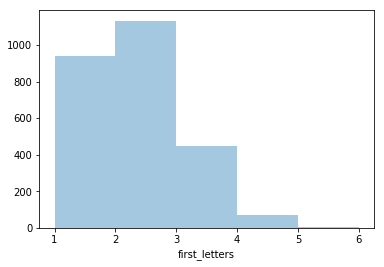

Average three_letters per document:  2.1017341040462427


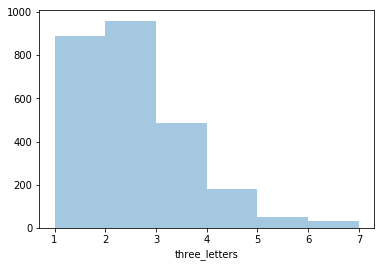

Average before_slash per document:  3.3364161849710983


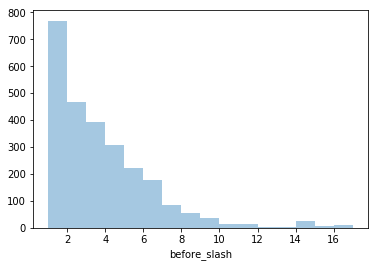

Average ipc_classes per document:  4.91868978805395


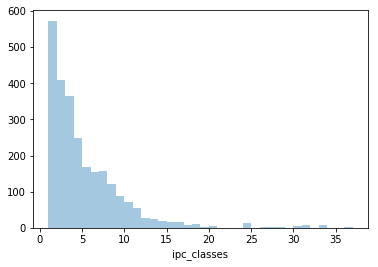

Average four_letters per document:  2.7915221579961464


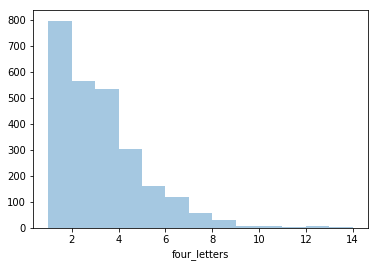

Average assignees per document:  1.5506743737957611


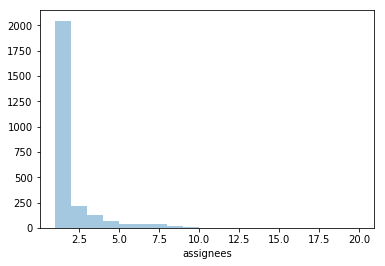

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

stats = pd.DataFrame()
columns = {'assignees', 'ipc_classes', 'first_letters', 'three_letters', 'four_letters', 'before_slash'}
  
for column in columns:
    
    stats[column] = df[column].apply(lambda x: len(x))    
    m = np.mean(stats[column])
    print("Average " + column + " per document: ", m)

    sns.distplot(stats[column], kde=False, bins=np.arange(stats[column].min(), stats[column].max() + 1, 1))  
    #sns.distplot(stats[column], kde=False)  
    plt.show()